In [19]:
# importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, f1_score, confusion_matrix, precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, LeaveOneOut, KFold
from imblearn.over_sampling import SMOTE



In [20]:
#Data
print(os.getcwd())

data_link = os.getcwd() + "\\TBI_data_2.csv"
print(data_link)

F:\CTSN_TBI\Machine_learning\GBM algorithm
F:\CTSN_TBI\Machine_learning\GBM algorithm\TBI_data_2.csv


In [21]:
df_tbi = pd.read_csv(data_link, delimiter = ",")
print(df_tbi)

     record_id  age_at_record  sex  tbi_cli_reason  tbi_cli_time_acci_hos  \
0          109           52.0  0.0             1.0                    2.0   
1          110           75.0  0.0             7.0                    NaN   
2          112           37.0  0.0             1.0                    NaN   
3          113           66.0  0.0             1.0                    NaN   
4          114           20.0  0.0             1.0                    4.0   
..         ...            ...  ...             ...                    ...   
255        391           22.0  0.0             7.0                    2.0   
256        392           40.0  0.0             1.0                    2.0   
257        393           84.0  0.0             1.0                 1440.0   
258        394           44.0  0.0             1.0                    5.0   
259        395           43.0  0.0             1.0                    3.0   

     tbi_cli_pulse  tbi_cli_temp  tbi_cli_blood_pressure  \
0             7

## Data processing

### 4 class

In [4]:
selected_columns = ["tbi_cli_glasgow", "ethanol", "tbi_cli_breathing_rate", "tbi_ct_subdural_hematoma_position_proprotion", "tbi_ct_subdural_hematoma_position_value",
"tbi_ct_rotterdam", "tbi_ct_epidural_hematoma_value", "tbi_ct_subdural_hematoma_thick", "tbi_ct_cerebral_contusion_volume",
"age_at_record","tbi_cli_time_acci_hos", "tbi_ct_skull_risk", "tbi_ct_epidural_hematoma_volume", "tbi_cli_pulse",
"tbi_ct_skull_fracture_characteristic","tbi_ct_subarachnoid_characteristic","tbi_cli_hypertension","tbi_cli_temp"]  # Replace with the names of the columns you want to select
# Select the columns
df_final = df_tbi[selected_columns]
df_final.head()


,tbi_cli_glasgow,ethanol,tbi_cli_breathing_rate,tbi_ct_subdural_hematoma_position_proprotion,tbi_ct_subdural_hematoma_position_value,tbi_ct_rotterdam,tbi_ct_epidural_hematoma_value,tbi_ct_subdural_hematoma_thick,tbi_ct_cerebral_contusion_volume,age_at_record,tbi_cli_time_acci_hos,tbi_ct_skull_risk,tbi_ct_epidural_hematoma_volume,tbi_cli_pulse,tbi_ct_skull_fracture_characteristic,tbi_ct_subarachnoid_characteristic,tbi_cli_hypertension,tbi_cli_temp
0,13,237.9,19.0,1.0,70.0,2.0,NaN,7.0,NaN,52.0,2.0,2.0,NaN,70.0,NaN,NaN,2.0,36.5
1,13,0.0,22.0,1.0,35.0,NaN,NaN,23.0,NaN,75.0,NaN,2.0,NaN,77.0,NaN,NaN,2.0,36.8
2,15,NaN,18.0,NaN,NaN,2.0,NaN,NaN,2.0,37.0,NaN,2.0,NaN,67.0,2.0,NaN,2.0,36.6
3,14,NaN,19.0,2.0,60.0,2.0,NaN,6.0,NaN,66.0,NaN,2.0,NaN,75.0,2.0,NaN,2.0,36.5
4,15,0.0,18.0,NaN,NaN,1.0,NaN,NaN,NaN,20.0,4.0,2.0,NaN,85.0,2.0,NaN,2.0,36.8


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = df_final
df_new_tbi_target = df_tbi['d_kl_tl']
df_new_array = scaler.fit_transform(df_sc)
df_tbi_f = pd.DataFrame(df_new_array)
df_tbi_f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.018599,1.855910,0.328322,-0.625543,0.543214,0.227946,NaN,-0.153532,NaN,0.402031,-0.194118,0.663325,NaN,-0.792786,NaN,NaN,0.200895,-0.795610
1,-0.018599,-0.725666,2.066500,-0.625543,-3.308037,NaN,NaN,2.097267,NaN,1.489632,NaN,0.663325,NaN,-0.134370,NaN,NaN,0.200895,0.442006
2,0.672219,NaN,-0.251070,NaN,NaN,0.227946,NaN,NaN,-0.505425,-0.307274,NaN,0.663325,NaN,-1.074964,0.582223,NaN,0.200895,-0.383072
3,0.326810,NaN,0.328322,1.598611,-0.557143,0.227946,NaN,-0.294207,NaN,1.064049,NaN,0.663325,NaN,-0.322489,0.582223,NaN,0.200895,-0.795610
4,0.672219,-0.725666,-0.251070,NaN,NaN,-1.020803,NaN,NaN,NaN,-1.111153,-0.182502,0.663325,NaN,0.618104,0.582223,NaN,0.200895,0.442006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.672219,NaN,NaN,NaN,NaN,-1.020803,NaN,NaN,NaN,-1.016579,-0.194118,0.663325,NaN,NaN,0.582223,NaN,0.200895,NaN
256,-1.745643,1.059191,NaN,NaN,NaN,0.227946,NaN,NaN,NaN,-0.165413,-0.194118,-1.507557,NaN,NaN,0.582223,0.688247,0.200895,NaN
257,-0.018599,NaN,NaN,-0.625543,-1.657501,-1.020803,NaN,-0.575557,NaN,1.915215,8.157150,0.663325,NaN,NaN,NaN,NaN,0.200895,NaN
258,0.326810,NaN,NaN,1.598611,0.543214,0.227946,NaN,-0.997582,NaN,0.023735,-0.176695,0.663325,NaN,NaN,0.582223,-1.452966,0.200895,NaN


In [6]:
df_tbi_f.columns = df_final.columns.to_list()
df_tbi_f

,tbi_cli_glasgow,ethanol,tbi_cli_breathing_rate,tbi_ct_subdural_hematoma_position_proprotion,tbi_ct_subdural_hematoma_position_value,tbi_ct_rotterdam,tbi_ct_epidural_hematoma_value,tbi_ct_subdural_hematoma_thick,tbi_ct_cerebral_contusion_volume,age_at_record,tbi_cli_time_acci_hos,tbi_ct_skull_risk,tbi_ct_epidural_hematoma_volume,tbi_cli_pulse,tbi_ct_skull_fracture_characteristic,tbi_ct_subarachnoid_characteristic,tbi_cli_hypertension,tbi_cli_temp
0,-0.018599,1.855910,0.328322,-0.625543,0.543214,0.227946,NaN,-0.153532,NaN,0.402031,-0.194118,0.663325,NaN,-0.792786,NaN,NaN,0.200895,-0.795610
1,-0.018599,-0.725666,2.066500,-0.625543,-3.308037,NaN,NaN,2.097267,NaN,1.489632,NaN,0.663325,NaN,-0.134370,NaN,NaN,0.200895,0.442006
2,0.672219,NaN,-0.251070,NaN,NaN,0.227946,NaN,NaN,-0.505425,-0.307274,NaN,0.663325,NaN,-1.074964,0.582223,NaN,0.200895,-0.383072
3,0.326810,NaN,0.328322,1.598611,-0.557143,0.227946,NaN,-0.294207,NaN,1.064049,NaN,0.663325,NaN,-0.322489,0.582223,NaN,0.200895,-0.795610
4,0.672219,-0.725666,-0.251070,NaN,NaN,-1.020803,NaN,NaN,NaN,-1.111153,-0.182502,0.663325,NaN,0.618104,0.582223,NaN,0.200895,0.442006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.672219,NaN,NaN,NaN,NaN,-1.020803,NaN,NaN,NaN,-1.016579,-0.194118,0.663325,NaN,NaN,0.582223,NaN,0.200895,NaN
256,-1.745643,1.059191,NaN,NaN,NaN,0.227946,NaN,NaN,NaN,-0.165413,-0.194118,-1.507557,NaN,NaN,0.582223,0.688247,0.200895,NaN
257,-0.018599,NaN,NaN,-0.625543,-1.657501,-1.020803,NaN,-0.575557,NaN,1.915215,8.157150,0.663325,NaN,NaN,NaN,NaN,0.200895,NaN
258,0.326810,NaN,NaN,1.598611,0.543214,0.227946,NaN,-0.997582,NaN,0.023735,-0.176695,0.663325,NaN,NaN,0.582223,-1.452966,0.200895,NaN


In [7]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_tbi_i = pd.DataFrame(knn_imputer.fit_transform(df_tbi_f), columns=df_tbi_f.columns)
df_tbi_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   tbi_cli_glasgow                               260 non-null    float64
 1   ethanol                                       260 non-null    float64
 2   tbi_cli_breathing_rate                        260 non-null    float64
 3   tbi_ct_subdural_hematoma_position_proprotion  260 non-null    float64
 4   tbi_ct_subdural_hematoma_position_value       260 non-null    float64
 5   tbi_ct_rotterdam                              260 non-null    float64
 6   tbi_ct_epidural_hematoma_value                260 non-null    float64
 7   tbi_ct_subdural_hematoma_thick                260 non-null    float64
 8   tbi_ct_cerebral_contusion_volume              260 non-null    float64
 9   age_at_record                                 260 non-null    flo

In [8]:
X= df_tbi_i
y = df_new_tbi_target
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 260 entries, 0 to 259
Series name: d_kl_tl
Non-Null Count  Dtype
--------------  -----
260 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
print(y.value_counts())

2    142
3     80
1     20
4     18
Name: d_kl_tl, dtype: int64


In [10]:
print(y.value_counts())

2    142
3     80
1     20
4     18
Name: d_kl_tl, dtype: int64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

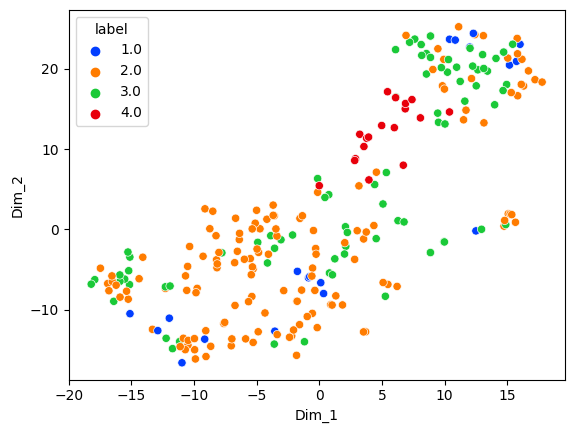

In [12]:
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, perplexity=25, random_state = 0)
tsne_data = model.fit_transform(X)
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()


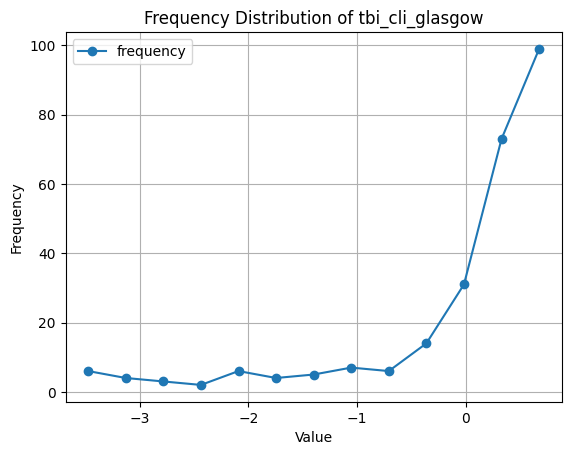

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_tbi_i is defined and contains the column 'tbi_cli_glasgow'
value_counts_df = df_tbi_i["tbi_cli_glasgow"].value_counts().reset_index()
value_counts_df.columns = ['Value', "frequency"]

# Sort the DataFrame by 'Value' column to ensure the line graph is ordered
value_counts_df = value_counts_df.sort_values(by='Value')

# Plotting using Pandas plot function with kind='line'
value_counts_df.plot(kind='line', x='Value', y='frequency', marker='o', linestyle='-')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of tbi_cli_glasgow')
plt.grid(True)
plt.show()


## Model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [15]:
X_train_new, y_train_new = SMOTE().fit_resample(X_train, y_train)

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy:  0.8939042089985486


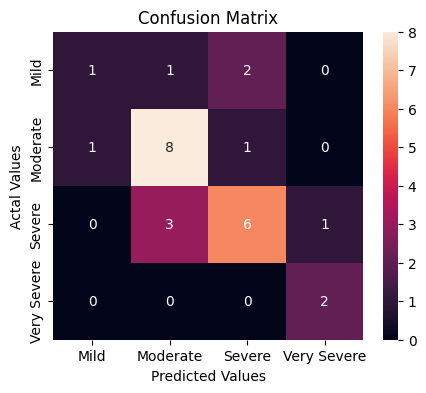

In [18]:
# Define the number of folds (k = 10)
random_search = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search_rf = GridSearchCV(random_search, param_grid_rf, cv=10, scoring='accuracy')
grid_search_rf.fit(X_train_new, y_train_new)
conf_mat = confusion_matrix(y_test, grid_search_rf.predict(X_test))

# In ra bộ tham số tốt nhất
print("Best Parameters: ", grid_search_rf.best_params_)

# In ra hiệu suất trên tập kiểm thử
print("Best Accuracy: ", grid_search_rf.best_score_)

cm_df = pd.DataFrame(conf_mat,
                     index = ['Mild', 'Moderate', 'Severe', 'Very Severe'], 
                     columns = ['Mild', 'Moderate', 'Severe', 'Very Severe'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig('confusion_matrix_103.png')
plt.show()

#### LOOCV

In [ ]:
from sklearn.model_selection import cross_val_score, LeaveOneOut


# Assuming df_tbi4x, X, and y are already defined

# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = make_pipeline(DecisionTreeClassifier())
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5))
gnb = make_pipeline(GaussianNB())
rf = make_pipeline(RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300))

# # Create a list of models
# models = [svm_model, logreg_model, dt_model, knn_model, gnb,rf]

# # Define LOOCV
# loo = LeaveOneOut()

# # Train and evaluate each model using LOOCV
# for model in models:
#     model_name = model.steps[-1][0]  # Extract the name of the classifier
#     cv_scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')
#     mean_accuracy = cv_scores.mean()
#     print(f'Mean Accuracy ({model_name}): {mean_accuracy}')


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=None)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(y_resampled.value_counts())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the confusion matrix data
confusion_matrix_data = np.array([[1, 0, 0, 0],
                                  [0, 13, 3, 0],
                                  [0, 1, 4, 0],
                                  [0, 0, 0, 4]])
# Calculate the total number of predictions
total_predictions = np.sum(confusion_matrix_data)

# Calculate the number of correct predictions (diagonal elements)
correct_predictions = np.trace(confusion_matrix_data)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

print("Accuracy:", accuracy)

# Define class labels
classes = ['Mild', 'Moderate', 'Severe', 'Very Severe']

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the figure before showing it
plt.savefig("Cm_103.png")

# Display the figure
plt.show()


Accuracy: 0.9545454545454546


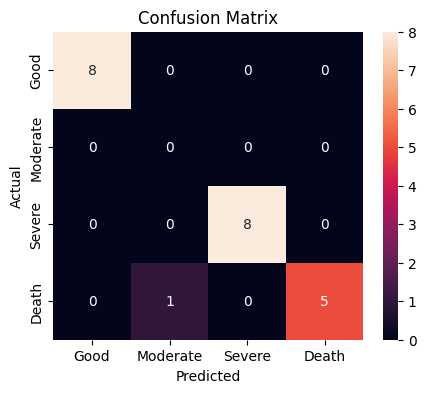

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the confusion matrix data
confusion_matrix_data = np.array([[8, 0, 0, 0],
                                  [0, 0, 0, 0],
                                  [0, 0,8, 0],
                                  [0, 1, 0, 5]])
# Calculate the total number of predictions
total_predictions = np.sum(confusion_matrix_data)

# Calculate the number of correct predictions (diagonal elements)
correct_predictions = np.trace(confusion_matrix_data)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

print("Accuracy:", accuracy)

# Define class labels
classes = ['Good','Moderate','Severe', 'Death']

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the figure before showing it
plt.savefig("Cm_103.png")

# Display the figure
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix


# models = [("SVM", svm_model), ("Logistic Regression", logreg_model), ("Decision Tree", dt_model), ("kNN", knn_model),("NB", gnb)]
models = [("RF", rf)]
# Define LOOCV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Train and evaluate each model using LOOCV
for model_name, model in models:
    y_true = []
    y_pred = []
    
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        smote = SMOTE(random_state= None)
        X_resampled, y_resampled = smote.fit_resample(X_train,y_train)
#     for train_index, test_index in kf.split(X_resampled, y_resampled):
#         X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
#         y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
        model.fit(X_resampled, y_resampled)
        y_true.extend(y_test)
        y_pred.extend(model.predict(X_test))

   # Compute and print the confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        print(f"Confusion Matrix ({model_name}):\n", cm)
        print("\n")

        report = classification_report(y_true, y_pred)
        print(f"Classification Report ({model_name}):\n", report)
        print("\n")

        cm_df = pd.DataFrame(cm,
                             index=['Mild', 'Moderate', 'Severe', 'Very Serve'],
                             columns=['Mild', 'Moderate', 'Severe', 'Very Serve'])

        # Plotting the confusion matrix with color change
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm_df, annot=True, cmap='Blues')  # Change 'Blues' to the desired colormap
        plt.title('Confusion Matrix')
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')
        plt.show()


In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['Mild','Moderate','Severe', 'Very Serve'], 
                     columns = ['Mild','Moderate','Severe', 'Very Serve'])

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
kf = KFold(n_splits=10)
accuracies = []
confusion_matrices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    smote = SMOTE(random_state=None)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    model.fit(X_resampled, y_resampled)
    
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Print confusion matrix and accuracy
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", accuracy)

# # Average accuracy across all folds
# average_accuracy = sum(accuracies) / len(accuracies)
# print("Average Accuracy:", average_accuracy)

# # Convert confusion matrices to DataFrame
# dfs = []
# for i, cm in enumerate(confusion_matrices):
#     cm_df = pd.DataFrame(cm, 
#                          index=['Mild', 'Moderate', 'Severe', 'Very Severe'], 
#                          columns=['Mild', 'Moderate', 'Severe', 'Very Severe'])
#     dfs.append(cm_df)


#### k fold

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
# Create a list of models
models = [svm_model, logreg_model, dt_model, knn_model,gnb]

# Define KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Train and evaluate each model using 10-fold cross-validation
for model in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f'Mean Accuracy ({model_name}): {mean_accuracy}')
#     cm = confusion_matrix(y_true, y_pred)
#     print(f"Confusion Matrix ({model_name}):\n", cm)
#     print("\n")


In [ ]:
# cm_df = pd.DataFrame(cm,
#                      index = ['Mild','Moderate','Severe', 'Very Serve'], 
#                      columns = ['Mild','Moderate','Severe', 'Very Serve'])

In [ ]:
# #Plotting the confusion matrix
# plt.figure(figsize=(5,4))
# sns.heatmap(cm_df, annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Assuming df_tbi4x, X, and y are already defined

# Define the models with their hyperparameter grids
svm_model = make_pipeline(SVC())
svm_param_grid = {'svc__kernel': ['linear', 'rbf']}

logreg_model = make_pipeline(LogisticRegression(max_iter=1000))
logreg_param_grid = {'logisticregression__C': [0.1, 1, 10]}


dt_model = make_pipeline(DecisionTreeClassifier())
dt_param_grid = {'decisiontreeclassifier__max_depth': [None, 10, 20], 'decisiontreeclassifier__min_samples_split': [2, 5, 10]}

knn_model = make_pipeline(KNeighborsClassifier())
knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}

gnb_model = make_pipeline( GaussianNB())


# Create a list of models with their corresponding parameter grids
models = [
    (svm_model, svm_param_grid),
    (logreg_model, logreg_param_grid),
    (dt_model, dt_param_grid),
    (knn_model, knn_param_grid),
    (gnb_model, {})  # GaussianNB does not have specific hyperparameters to tune
]

# Perform GridSearchCV for each model
for model, param_grid in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    
    grid_search = GridSearchCV(model, param_grid, cv=loo, scoring='accuracy')
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f'Best Parameters ({model_name}): {best_params}')
    print(f'Best Accuracy ({model_name}): {best_score}')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = make_pipeline(DecisionTreeClassifier())
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5))
gnb_model = make_pipeline(GaussianNB())

# Create a list of models
models = [("SVM", svm_model), ("Logistic Regression", logreg_model), 
          ("Decision Tree", dt_model), ("KNN", knn_model), ("Gaussian NB", gnb_model)]

# Perform train/test split with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model
for name, model in models:
    print(f"Evaluating {name} model:")
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro',zero_division=1)
    
    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print()  # Add empty line for better readability


In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming svm_model is your trained SVM model
# # Make predictions on the test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# y_pred = svm_model.predict(X_test)
# # Calculate evaluation metrics
# print(y_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='macro')
# recall = recall_score(y_test, y_pred, average='macro')
# precision = precision_score(y_test, y_pred, average='macro',zero_division=1)
    
#     # Print the evaluation metrics
# print(f"Accuracy: {accuracy:.6f}")
# print(f"F1 Score: {f1:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"Precision: {precision:.4f}")
# print()  # Add empty line for better readability

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)


# # Define class labels
# classes = ['Mild', 'Moderate', 'Severe', 'Very Severe']

# # Create a DataFrame from the confusion matrix
# cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
# plt.title('Confusion Matrix - SVM Model')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()


### SMOTE

In [ ]:
X= df_tbi_i
y = df_new_tbi_target

In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to address class imbalance
smote = SMOTE(random_state= None)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_resampled.shape}''')


In [ ]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Assuming df_tbi4x, X, and y are already defined

# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = make_pipeline(DecisionTreeClassifier())
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5))
gnb = make_pipeline(GaussianNB())

# Create a list of models
models = [svm_model, logreg_model, dt_model, knn_model, gnb]

# Define LOOCV
loo = LeaveOneOut()

# Train and evaluate each model using LOOCV
for model in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    cv_scores = cross_val_score(model,X_resampled, y_resampled, cv=loo, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f'Mean Accuracy ({model_name}): {mean_accuracy}')


In [ ]:
# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = make_pipeline(DecisionTreeClassifier())
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5))
gnb = make_pipeline(GaussianNB())

# Create a list of models
models = [svm_model, logreg_model, dt_model, knn_model, gnb]

# Define LOOCV
kf = KFold(n_splits=10, shuffle=True, random_state=42)


for model in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    cv_scores = cross_val_score(model,X_resampled, y_resampled, cv=kf, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f'Mean Accuracy ({model_name}): {mean_accuracy}')


In [ ]:
from sklearn.model_selection import GridSearchCV

# Assuming df_tbi4x, X, and y are already defined

# Define the models with their hyperparameter grids
svm_model = make_pipeline(SVC())
svm_param_grid = {'svc__kernel': ['linear', 'rbf']}

logreg_model = make_pipeline(LogisticRegression(max_iter=1000))
logreg_param_grid = {'logisticregression__C': [0.1, 1, 10]}


dt_model = make_pipeline(DecisionTreeClassifier())
dt_param_grid = {'decisiontreeclassifier__max_depth': [None, 10, 20], 'decisiontreeclassifier__min_samples_split': [2, 5, 10]}

knn_model = make_pipeline(KNeighborsClassifier())
knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}

gnb_model = make_pipeline( GaussianNB())


# Create a list of models with their corresponding parameter grids
models = [
    (svm_model, svm_param_grid),
    (logreg_model, logreg_param_grid),
    (dt_model, dt_param_grid),
    (knn_model, knn_param_grid),
    (gnb_model, {})  # GaussianNB does not have specific hyperparameters to tune
]

# Perform GridSearchCV for each model
for model, param_grid in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f'Best Parameters ({model_name}): {best_params}')
    print(f'Best Accuracy ({model_name}): {best_score}')


## Evalution metrics

### K fold

In [ ]:
svm_model = make_pipeline(SVC(kernel='rbf', C=1.0, gamma='scale', probability=True))
logreg_model = make_pipeline(LogisticRegression(solver='lbfgs', max_iter=1000))
dt_model = make_pipeline(DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1))
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5, weights='distance'))
gnb_model = make_pipeline(GaussianNB(var_smoothing=1e-9))
rf_model = make_pipeline(RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1))

# Create a list of models
models = [svm_model, logreg_model, dt_model, knn_model, gnb,rf]

In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index],y.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to address class imbalance
smote = SMOTE(random_state= None)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_resampled.shape}''')


In [ ]:
# Define LOOCV
from sklearn.model_selection import cross_val_score, LeaveOneOut
kf = KFold(n_splits=10, shuffle=True, random_state=42)


# Train and evaluate each model using LOOCV
for model in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f'Mean Accuracy ({model_name}): {mean_accuracy}')


In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index],y.iloc[test_index]
        smote = SMOTE(random_state= None)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        
        # Train model on training data
        model.fit(X_resampled, y_resampled)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in kf.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


In [ ]:
# Import necessary libraries
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


### Draw decision tree

In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to address class imbalance
smote = SMOTE(random_state= None)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_resampled.shape}''')


In [ ]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=42)
clf_model = clf.fit(X_resampled, y_resampled)

In [ ]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming df_tbi_i.feature_names and df_new_tbi_target.target_names contain the feature names and target names respectively

# Convert target names to string if they're not already strings
target_names_str = [str(name) for name in df_new_tbi_target.unique()]

# Create a figure and plot the decision tree
fig = plt.figure(figsize=(120,60))
_ = plot_tree(clf, 
              feature_names=df_tbi_i.columns.tolist(),  # Convert feature names to list if not already
              class_names=target_names_str,  # Pass the target names as strings
              filled=True)
plt.show()


In [ ]:
fig.savefig("decistion_tree.png")

## Draw random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest Classifier with default hyperparameters and random state set to 42
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to your data
rf_model = rf_classifier.fit(X, y)


In [ ]:
# # You can also print the textual representation of one of the decision trees in the forest if needed
# # For example, to print the first tree:
# text_representation = tree.export_text(rf_classifier.estimators_[0])
# print(text_representation)

In [ ]:
# Access the first decision tree from the forest
first_tree = rf_classifier.estimators_[0]

# Convert target names to string if they're not already strings
target_names_str = [str(name) for name in df_new_tbi_target.unique()]

# Create a figure and plot the decision tree
fig = plt.figure(figsize=(120, 60))  # Adjust the figure size as needed
_ = plot_tree(first_tree, 
              feature_names=df_tbi_i.columns.tolist(),  # Convert feature names to list if not already
              class_names=target_names_str,  # Pass the target names as strings
              filled=True)
plt.show()

In [ ]:
fig.savefig("random_forest.png")
